In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from sko.GA import GA_TSP
from numba import njit

### 读取数据

In [2]:
data = pd.read_csv('./drilling.csv')
points = data.values
points

array([[288, 149],
       [288, 129],
       [270, 133],
       [256, 141],
       [256, 157],
       [246, 157],
       [236, 169],
       [228, 169],
       [228, 161],
       [220, 169],
       [212, 169],
       [204, 169],
       [196, 169],
       [188, 169],
       [196, 161],
       [188, 145],
       [172, 145],
       [164, 145],
       [156, 145],
       [148, 145],
       [140, 145],
       [148, 169],
       [164, 169],
       [172, 169],
       [156, 169],
       [140, 169],
       [132, 169],
       [124, 169],
       [116, 161],
       [104, 153],
       [104, 161],
       [104, 169],
       [ 90, 165],
       [ 80, 157],
       [ 64, 157],
       [ 64, 165],
       [ 56, 169],
       [ 56, 161],
       [ 56, 153],
       [ 56, 145],
       [ 56, 137],
       [ 56, 129],
       [ 56, 121],
       [ 40, 121],
       [ 40, 129],
       [ 40, 137],
       [ 40, 145],
       [ 40, 153],
       [ 40, 161],
       [ 40, 169],
       [ 32, 169],
       [ 32, 161],
       [ 32,

### 计算点间的距离矩阵

In [3]:
distance_matrix = spatial.distance.cdist(points, points, metric='euclidean')
distance_matrix

array([[ 0.        , 20.        , 24.08318916, ..., 43.26661531,
        34.40930107, 17.88854382],
       [20.        ,  0.        , 18.43908891, ..., 36.22154055,
        28.        ,  8.94427191],
       [24.08318916, 18.43908891,  0.        , ..., 19.6977156 ,
        10.77032961, 10.        ],
       ...,
       [43.26661531, 36.22154055, 19.6977156 , ...,  0.        ,
         8.94427191, 29.12043956],
       [34.40930107, 28.        , 10.77032961, ...,  8.94427191,
         0.        , 20.39607805],
       [17.88854382,  8.94427191, 10.        , ..., 29.12043956,
        20.39607805,  0.        ]])

In [4]:
distance_matrix.shape

(280, 280)

In [5]:
# 计算走过的总路程距离
def compute_distance(routine):
    num_points, = routine.shape
    # 求和, 每段的距离放到[]里，通过sum进行求和 
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

### 利用遗传算法求解

In [6]:
%%time
# 参数设置
num_points = len(points)
size_pop = 200
max_iter = 500

# 运行遗传算法求解
ga_tsp = GA_TSP(func=compute_distance, n_dim=num_points, size_pop=size_pop, max_iter=max_iter, prob_mut=0.2)
best_points, best_distance = ga_tsp.run()

Wall time: 58.7 s


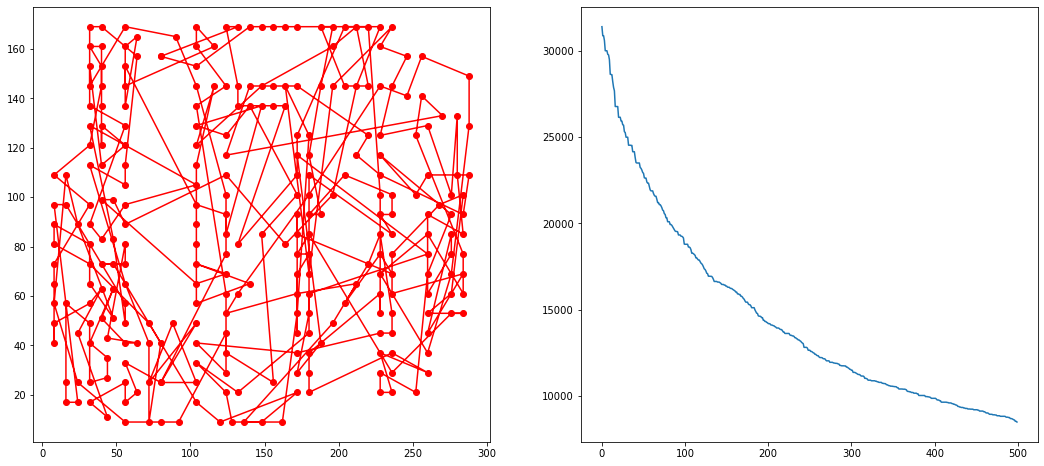

目前最小距离为8499.873.


In [10]:
# 画图
def plot_result(best_points, best_distance):
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))
    best_points_ = np.concatenate([best_points, [best_points[0]]])
    best_points_coordinate = points[best_points_, :]
    ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
    ax[1].plot(ga_tsp.generation_best_Y)
    plt.show()
    print(f'目前最小距离为{best_distance[0]:.3f}.')

plot_result(best_points, best_distance)

#### 由迭代曲线可见还没收敛

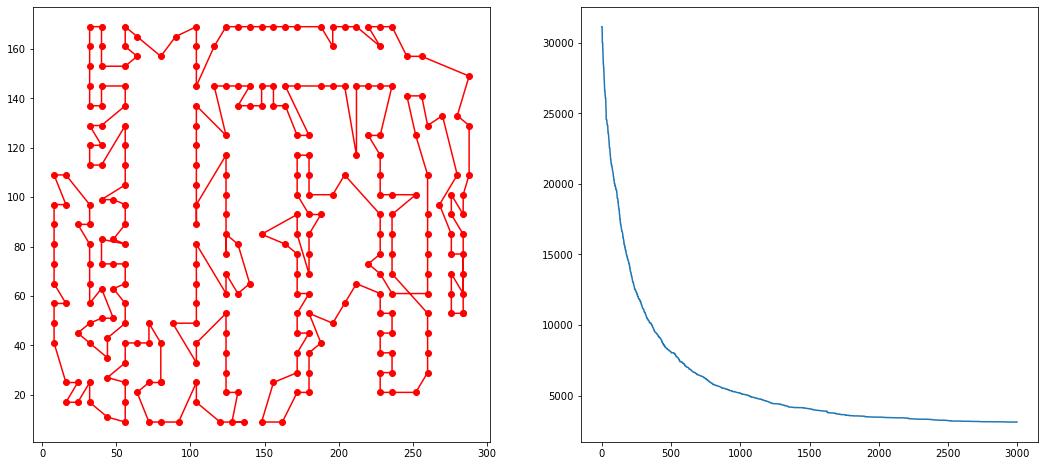

目前最小距离为3129.211.
Wall time: 9min 33s


In [12]:
%%time
# 参数设置
num_points = len(points)
size_pop = 300  # 增大种群规模
max_iter = 3000  # 继续增大迭代次数

# 运行遗传算法求解
ga_tsp = GA_TSP(func=compute_distance, n_dim=num_points, size_pop=size_pop, max_iter=max_iter, prob_mut=0.2)
best_points, best_distance = ga_tsp.run()
plot_result(best_points, best_distance)

#### 断点继续运行
由结果来看，个别地方还有一点小瑕疵，因此在当前最优解的基础上再继续迭代一定次数。

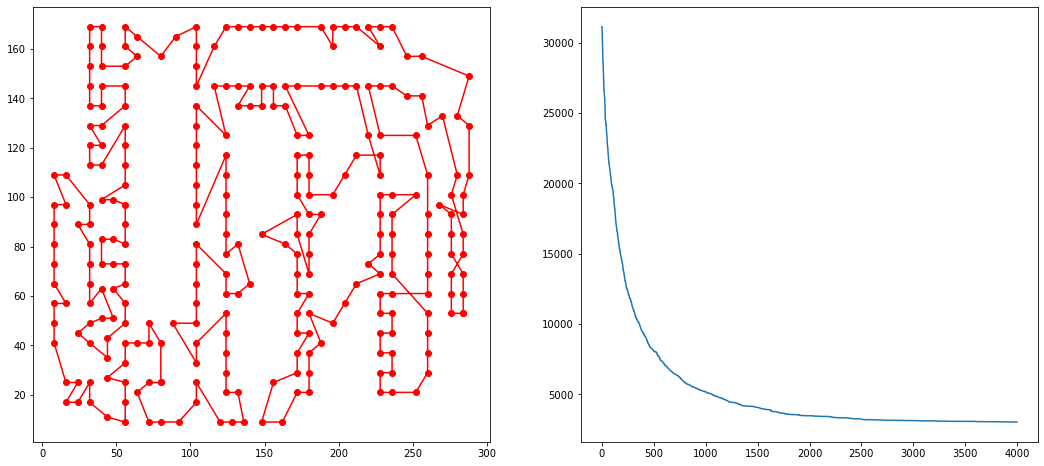

目前最小距离为3029.495.


In [14]:
best_points, best_distance = ga_tsp.run(1000)
plot_result(best_points, best_distance)

由结果来看，除了个别地方还有一点小瑕疵意外，总体来说感觉优化效果还不错。